# **Leitura e tratamento dos dados**

In [1]:
path = 'https://raw.githubusercontent.com/LunusMax/football-data/main/BallonDor/'

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib import cm
from matplotlib.colors import ListedColormap
import os
from io import StringIO

In [3]:
# Lista com os nomes dos arquivos

archives = [
    "trophies",
    "vini jr.csv",
    "raphinha.csv",
    "dembele.csv",
    "bellingham.csv",
    "doue.csv",
    "haaland.csv",
    "gyokeres.csv",
    "hakimi.csv",
    "harry kane.csv",
    "kvaratskhelia.csv",
    "mbappe.csv",
    "cole palmer.csv",
    "lamine yamal.csv",
    "lautaro martinez.csv",
    "declan rice.csv",
    "vitinha.csv",
    "wirtz.csv",
]

In [4]:
for archive in archives:
    filename = archive if archive.endswith(".csv") else archive + ".csv"
    url = path + filename.replace(" ", "%20")

    var_name = os.path.splitext(filename)[0].lower().replace(" ", "_")
    globals()[var_name] = pd.read_csv(url, sep=";")

    print(f"Carregado {filename} → variável '{var_name}' ({len(globals()[var_name])} linhas)")

Carregado trophies.csv → variável 'trophies' (17 linhas)
Carregado vini jr.csv → variável 'vini_jr' (5 linhas)
Carregado raphinha.csv → variável 'raphinha' (4 linhas)
Carregado dembele.csv → variável 'dembele' (4 linhas)
Carregado bellingham.csv → variável 'bellingham' (5 linhas)
Carregado doue.csv → variável 'doue' (4 linhas)
Carregado haaland.csv → variável 'haaland' (5 linhas)
Carregado gyokeres.csv → variável 'gyokeres' (2 linhas)
Carregado hakimi.csv → variável 'hakimi' (4 linhas)
Carregado harry kane.csv → variável 'harry_kane' (3 linhas)
Carregado kvaratskhelia.csv → variável 'kvaratskhelia' (5 linhas)
Carregado mbappe.csv → variável 'mbappe' (5 linhas)
Carregado cole palmer.csv → variável 'cole_palmer' (4 linhas)
Carregado lamine yamal.csv → variável 'lamine_yamal' (4 linhas)
Carregado lautaro martinez.csv → variável 'lautaro_martinez' (4 linhas)
Carregado declan rice.csv → variável 'declan_rice' (4 linhas)
Carregado vitinha.csv → variável 'vitinha' (4 linhas)
Carregado wirtz.c

In [5]:
doue.head()

,Season,Age,Squad,Country,Comp,MP,Starts,Min,90s,Gls,...,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches,SCA,GCA,PPA
0,2024-2025,19,Paris S-G,NaN,1. Champions Lg,16,8,740,8.2,5,...,0.97,0.34,0.32,0.67,0.34,0.67,Matches,35.0,4.0,11.0
1,2024-2025,19,Paris S-G,fr FRA,Coupe de France,6,6,471,5.2,4,...,1.72,NaN,NaN,NaN,NaN,NaN,Matches,NaN,NaN,NaN
2,2024-2025,19,Paris S-G,fr FRA,1. Ligue 1,31,18,1730,19.2,6,...,0.62,0.27,0.41,0.67,0.27,0.67,Matches,109.0,24.0,51.0
3,2024-2025,19,Paris S-G,fr FRA,Trophée des Champions,1,1,71,0.8,0,...,0.00,NaN,NaN,NaN,NaN,NaN,Matches,NaN,NaN,NaN


In [6]:
doue.columns

Index(['Season', 'Age', 'Squad', 'Country', 'Comp', 'MP', 'Starts', 'Min',
       '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG',
       'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls.1', 'Ast.1',
       'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1', 'xG+xAG', 'npxG.1',
       'npxG+xAG.1', 'Matches', 'SCA', 'GCA', 'PPA'],
      dtype='object')

In [7]:
trophies.columns

Index(['Player', 'Trophies'], dtype='object')

In [8]:
# Cria lista com os DataFrames já carregados e seus nomes de variável

players_dfs = {
    "vini jr": vini_jr,
    "raphinha": raphinha,
    "dembele": dembele,
    "bellingham": bellingham,
    "doue": doue,
    "haaland": haaland,
    "gyokeres": gyokeres,
    "hakimi": hakimi,
    "harry kane": harry_kane,
    "kvaratskhelia": kvaratskhelia,
    "mbappe": mbappe,
    "cole palmer": cole_palmer,
    "lamine yamal": lamine_yamal,
    "lautaro martinez": lautaro_martinez,
    "declan rice": declan_rice,
    "vitinha": vitinha,
    "wirtz": wirtz,
}

In [9]:
# Adiciona a coluna player em cada df e empilha tudo

dfs = []
for player_name, df in players_dfs.items():
    df_copy = df.copy()
    df_copy.insert(0, "player", player_name)
    dfs.append(df_copy)

In [10]:
df = pd.concat(dfs, ignore_index=True)

In [11]:
df.head(15)

,player,Season,Age,Squad,Country,Comp,MP,Starts,Min,90s,...,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches,SCA,GCA,PPA
0,vini jr,2024-2025,24,Real Madrid,NaN,1. Champions Lg,12,12,1103.0,12.3,...,0.73,0.54,0.31,0.85,0.42,0.72,Matches,52.0,9.0,16.0
1,vini jr,2024-2025,24,Real Madrid,es ESP,Copa del Rey,6,4,468.0,5.2,...,0.58,NaN,NaN,NaN,NaN,NaN,Matches,NaN,NaN,NaN
2,vini jr,2024-2025,24,Real Madrid,es ESP,1. La Liga,30,24,2253.0,25.0,...,0.68,0.41,0.32,0.73,0.33,0.65,Matches,135.0,18.0,36.0
3,vini jr,2024-2025,24,Real Madrid,NaN,Super Cup,1,1,87.0,1.0,...,1.03,NaN,NaN,NaN,NaN,NaN,Matches,NaN,NaN,NaN
4,vini jr,2024-2025,24,Real Madrid,es ESP,Supercopa de España,2,2,162.0,1.8,...,0.56,NaN,NaN,NaN,NaN,NaN,Matches,NaN,NaN,NaN
5,raphinha,2024-2025,27,Barcelona,NaN,1. Champions Lg,14,14,1222.0,13.6,...,1.55,0.44,0.56,1.00,0.44,1.00,Matches,76.0,12.0,25.0
6,raphinha,2024-2025,27,Barcelona,es ESP,Copa del Rey,5,5,420.0,4.7,...,1.07,NaN,NaN,NaN,NaN,NaN,Matches,NaN,NaN,NaN
7,raphinha,2024-2025,27,Barcelona,es ESP,1. La Liga,36,32,2839.0,31.5,...,0.79,0.61,0.40,1.01,0.56,0.96,Matches,163.0,22.0,67.0
8,raphinha,2024-2025,27,Barcelona,es ESP,Supercopa de España,2,2,168.0,1.9,...,1.61,NaN,NaN,NaN,NaN,NaN,Matches,NaN,NaN,NaN
9,dembele,2024-2025,27,Paris S-G,NaN,1. Champions Lg,15,13,1158.0,12.9,...,1.09,0.65,0.29,0.94,0.65,0.94,Matches,80.0,9.0,28.0


In [12]:
# Faz o merge com trophies

df["player_key"] = df["player"].str.strip().str.lower()
trophies["player_key"] = trophies["Player"].str.strip().str.lower()

df = df.merge(
    trophies[["player_key","Trophies"]],
    on="player_key",
    how="left"
)

df.drop(columns=["player_key"], inplace=True)

In [13]:
df.head(15)

,player,Season,Age,Squad,Country,Comp,MP,Starts,Min,90s,...,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches,SCA,GCA,PPA,Trophies
0,vini jr,2024-2025,24,Real Madrid,NaN,1. Champions Lg,12,12,1103.0,12.3,...,0.54,0.31,0.85,0.42,0.72,Matches,52.0,9.0,16.0,0
1,vini jr,2024-2025,24,Real Madrid,es ESP,Copa del Rey,6,4,468.0,5.2,...,NaN,NaN,NaN,NaN,NaN,Matches,NaN,NaN,NaN,0
2,vini jr,2024-2025,24,Real Madrid,es ESP,1. La Liga,30,24,2253.0,25.0,...,0.41,0.32,0.73,0.33,0.65,Matches,135.0,18.0,36.0,0
3,vini jr,2024-2025,24,Real Madrid,NaN,Super Cup,1,1,87.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Matches,NaN,NaN,NaN,0
4,vini jr,2024-2025,24,Real Madrid,es ESP,Supercopa de España,2,2,162.0,1.8,...,NaN,NaN,NaN,NaN,NaN,Matches,NaN,NaN,NaN,0
5,raphinha,2024-2025,27,Barcelona,NaN,1. Champions Lg,14,14,1222.0,13.6,...,0.44,0.56,1.00,0.44,1.00,Matches,76.0,12.0,25.0,2
6,raphinha,2024-2025,27,Barcelona,es ESP,Copa del Rey,5,5,420.0,4.7,...,NaN,NaN,NaN,NaN,NaN,Matches,NaN,NaN,NaN,2
7,raphinha,2024-2025,27,Barcelona,es ESP,1. La Liga,36,32,2839.0,31.5,...,0.61,0.40,1.01,0.56,0.96,Matches,163.0,22.0,67.0,2
8,raphinha,2024-2025,27,Barcelona,es ESP,Supercopa de España,2,2,168.0,1.9,...,NaN,NaN,NaN,NaN,NaN,Matches,NaN,NaN,NaN,2
9,dembele,2024-2025,27,Paris S-G,NaN,1. Champions Lg,15,13,1158.0,12.9,...,0.65,0.29,0.94,0.65,0.94,Matches,80.0,9.0,28.0,3


In [14]:
# Arrumar coluna de minutagem

df.rename(columns={'Min': 'Minutes'}, inplace=True)

if "Minutes" in df.columns:
    df["Minutes"] = (
        df["Minutes"]
        .astype(str)
        .str.replace(",", "", regex=False)
        .astype(float)
    )

In [15]:
df.head()

,player,Season,Age,Squad,Country,Comp,MP,Starts,Minutes,90s,...,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches,SCA,GCA,PPA,Trophies
0,vini jr,2024-2025,24,Real Madrid,NaN,1. Champions Lg,12,12,1103.0,12.3,...,0.54,0.31,0.85,0.42,0.72,Matches,52.0,9.0,16.0,0
1,vini jr,2024-2025,24,Real Madrid,es ESP,Copa del Rey,6,4,468.0,5.2,...,NaN,NaN,NaN,NaN,NaN,Matches,NaN,NaN,NaN,0
2,vini jr,2024-2025,24,Real Madrid,es ESP,1. La Liga,30,24,2253.0,25.0,...,0.41,0.32,0.73,0.33,0.65,Matches,135.0,18.0,36.0,0
3,vini jr,2024-2025,24,Real Madrid,NaN,Super Cup,1,1,87.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Matches,NaN,NaN,NaN,0
4,vini jr,2024-2025,24,Real Madrid,es ESP,Supercopa de España,2,2,162.0,1.8,...,NaN,NaN,NaN,NaN,NaN,Matches,NaN,NaN,NaN,0


In [16]:
df.columns

Index(['player', 'Season', 'Age', 'Squad', 'Country', 'Comp', 'MP', 'Starts',
       'Minutes', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY',
       'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1',
       'xG+xAG', 'npxG.1', 'npxG+xAG.1', 'Matches', 'SCA', 'GCA', 'PPA',
       'Trophies'],
      dtype='object')

In [17]:
# Manter apenas colunas relevantes

cols_keep = [
    "player", "Squad", "Comp","Minutes", "90s", "Gls", "Ast", "G+A", "G-PK",
    "xG", "npxG", "xAG", "npxG+xAG",
    "PrgC", "PrgP", "PrgR",
    "SCA", "GCA", "PPA",
    "Trophies"
]

df = df[cols_keep].copy()

In [18]:
df.head()

,player,Squad,Comp,Minutes,90s,Gls,Ast,G+A,G-PK,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,SCA,GCA,PPA,Trophies
0,vini jr,Real Madrid,1. Champions Lg,1103.0,12.3,8.0,2.0,10.0,7.0,6.7,5.1,3.8,8.9,82.0,28.0,122.0,52.0,9.0,16.0,0
1,vini jr,Real Madrid,Copa del Rey,468.0,5.2,1.0,2.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,vini jr,Real Madrid,1. La Liga,2253.0,25.0,11.0,8.0,19.0,9.0,10.4,8.2,8.0,16.2,169.0,85.0,256.0,135.0,18.0,36.0,0
3,vini jr,Real Madrid,Super Cup,87.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,vini jr,Real Madrid,Supercopa de España,162.0,1.8,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [19]:
df.columns

Index(['player', 'Squad', 'Comp', 'Minutes', '90s', 'Gls', 'Ast', 'G+A',
       'G-PK', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'SCA',
       'GCA', 'PPA', 'Trophies'],
      dtype='object')

In [20]:
# Métricas por 90 minutos

metrics = [
    "Gls","Ast","G+A","G-PK","xG","npxG","xAG","npxG+xAG",
    "PrgC","PrgP","PrgR","SCA","GCA","PPA"
]

for metric in metrics:
  df[f"{metric}/90"] = (df[metric] * 90) / df['Minutes']

In [21]:
df.head()

,player,Squad,Comp,Minutes,90s,Gls,Ast,G+A,G-PK,xG,...,xG/90,npxG/90,xAG/90,npxG+xAG/90,PrgC/90,PrgP/90,PrgR/90,SCA/90,GCA/90,PPA/90
0,vini jr,Real Madrid,1. Champions Lg,1103.0,12.3,8.0,2.0,10.0,7.0,6.7,...,0.546691,0.416138,0.310063,0.726201,6.690843,2.284678,9.954669,4.242974,0.734361,1.305530
1,vini jr,Real Madrid,Copa del Rey,468.0,5.2,1.0,2.0,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,vini jr,Real Madrid,1. La Liga,2253.0,25.0,11.0,8.0,19.0,9.0,10.4,...,0.415446,0.327563,0.319574,0.647137,6.750999,3.395473,10.226365,5.392810,0.719041,1.438083
3,vini jr,Real Madrid,Super Cup,87.0,1.0,0.0,1.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,vini jr,Real Madrid,Supercopa de España,162.0,1.8,0.0,1.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.columns

Index(['player', 'Squad', 'Comp', 'Minutes', '90s', 'Gls', 'Ast', 'G+A',
       'G-PK', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'SCA',
       'GCA', 'PPA', 'Trophies', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90',
       'xG/90', 'npxG/90', 'xAG/90', 'npxG+xAG/90', 'PrgC/90', 'PrgP/90',
       'PrgR/90', 'SCA/90', 'GCA/90', 'PPA/90'],
      dtype='object')

In [23]:
# Manter apenas as linhas onde Comp começa com "1. " -> Champions e Liga Doméstica

df = df[df["Comp"].astype(str).str.startswith("1.")].copy()

In [24]:
df_weights = df.copy()

In [25]:
df_weights.head()

,player,Squad,Comp,Minutes,90s,Gls,Ast,G+A,G-PK,xG,...,xG/90,npxG/90,xAG/90,npxG+xAG/90,PrgC/90,PrgP/90,PrgR/90,SCA/90,GCA/90,PPA/90
0,vini jr,Real Madrid,1. Champions Lg,1103.0,12.3,8.0,2.0,10.0,7.0,6.7,...,0.546691,0.416138,0.310063,0.726201,6.690843,2.284678,9.954669,4.242974,0.734361,1.305530
2,vini jr,Real Madrid,1. La Liga,2253.0,25.0,11.0,8.0,19.0,9.0,10.4,...,0.415446,0.327563,0.319574,0.647137,6.750999,3.395473,10.226365,5.392810,0.719041,1.438083
5,raphinha,Barcelona,1. Champions Lg,1222.0,13.6,13.0,8.0,21.0,13.0,5.9,...,0.434534,0.434534,0.545008,0.972177,3.387889,4.271686,10.679214,5.597381,0.883797,1.841244
7,raphinha,Barcelona,1. La Liga,2839.0,31.5,18.0,9.0,27.0,16.0,19.2,...,0.608665,0.557943,0.402607,0.960549,2.979923,4.279676,11.063755,5.167312,0.697429,2.123987
9,dembele,Paris S-G,1. Champions Lg,1158.0,12.9,8.0,6.0,14.0,8.0,8.1,...,0.629534,0.629534,0.287565,0.917098,6.917098,6.761658,10.725389,6.217617,0.699482,2.176166


In [26]:
df_weights.columns

Index(['player', 'Squad', 'Comp', 'Minutes', '90s', 'Gls', 'Ast', 'G+A',
       'G-PK', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'SCA',
       'GCA', 'PPA', 'Trophies', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90',
       'xG/90', 'npxG/90', 'xAG/90', 'npxG+xAG/90', 'PrgC/90', 'PrgP/90',
       'PrgR/90', 'SCA/90', 'GCA/90', 'PPA/90'],
      dtype='object')

# **Análise sem pesos por Ligas**

A análise considerou todas as kugas domésticas com mesmo peso.

In [27]:
df.head(15)

,player,Squad,Comp,Minutes,90s,Gls,Ast,G+A,G-PK,xG,...,xG/90,npxG/90,xAG/90,npxG+xAG/90,PrgC/90,PrgP/90,PrgR/90,SCA/90,GCA/90,PPA/90
0,vini jr,Real Madrid,1. Champions Lg,1103.0,12.3,8.0,2.0,10.0,7.0,6.7,...,0.546691,0.416138,0.310063,0.726201,6.690843,2.284678,9.954669,4.242974,0.734361,1.305530
2,vini jr,Real Madrid,1. La Liga,2253.0,25.0,11.0,8.0,19.0,9.0,10.4,...,0.415446,0.327563,0.319574,0.647137,6.750999,3.395473,10.226365,5.392810,0.719041,1.438083
5,raphinha,Barcelona,1. Champions Lg,1222.0,13.6,13.0,8.0,21.0,13.0,5.9,...,0.434534,0.434534,0.545008,0.972177,3.387889,4.271686,10.679214,5.597381,0.883797,1.841244
7,raphinha,Barcelona,1. La Liga,2839.0,31.5,18.0,9.0,27.0,16.0,19.2,...,0.608665,0.557943,0.402607,0.960549,2.979923,4.279676,11.063755,5.167312,0.697429,2.123987
9,dembele,Paris S-G,1. Champions Lg,1158.0,12.9,8.0,6.0,14.0,8.0,8.1,...,0.629534,0.629534,0.287565,0.917098,6.917098,6.761658,10.725389,6.217617,0.699482,2.176166
11,dembele,Paris S-G,1. Ligue 1,1730.0,19.2,21.0,6.0,27.0,20.0,16.6,...,0.863584,0.821965,0.426590,1.248555,6.606936,7.127168,13.109827,5.722543,0.780347,2.861272
13,bellingham,Real Madrid,1. Champions Lg,1131.0,12.6,3.0,3.0,6.0,3.0,3.8,...,0.302387,0.302387,0.175066,0.477454,1.830239,6.206897,3.740053,3.103448,0.477454,0.795756
15,bellingham,Real Madrid,1. La Liga,2488.0,27.6,9.0,8.0,17.0,8.0,11.4,...,0.412379,0.358119,0.141077,0.495579,2.676849,7.198553,5.172830,3.798232,0.470257,1.121383
18,doue,Paris S-G,1. Champions Lg,740.0,8.2,5.0,3.0,8.0,5.0,2.7,...,0.328378,0.328378,0.304054,0.632432,6.324324,3.283784,7.783784,4.256757,0.486486,1.337838
20,doue,Paris S-G,1. Ligue 1,1730.0,19.2,6.0,6.0,12.0,6.0,5.1,...,0.265318,0.265318,0.405780,0.676301,5.046243,7.231214,12.069364,5.670520,1.248555,2.653179


In [28]:
df.columns

Index(['player', 'Squad', 'Comp', 'Minutes', '90s', 'Gls', 'Ast', 'G+A',
       'G-PK', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'SCA',
       'GCA', 'PPA', 'Trophies', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90',
       'xG/90', 'npxG/90', 'xAG/90', 'npxG+xAG/90', 'PrgC/90', 'PrgP/90',
       'PrgR/90', 'SCA/90', 'GCA/90', 'PPA/90'],
      dtype='object')

In [29]:
# Criando métricas de score

# Produção ofensiva: gols, assistências e xG combinados
df["off_score"] = (
    df["Gls/90"] +
    df["Ast/90"] +
    df["npxG+xAG/90"]
)

# Criação de jogo: SCA, GCA e passes para a área
df["creation_score"] = (
    df["SCA/90"] +
    df["GCA/90"] +
    df["PPA/90"]
)

# Progressão: conduções e passes progressivos
df["progression_score"] = (
    df["PrgC/90"] +
    df["PrgP/90"]
)

# Score agregado sem peso (por linha de competição)
df["core_score"] = (
    0.4 * df["off_score"] +
    0.35 * df["creation_score"] +
    0.25 * df["progression_score"]
)

# Conferir rapidamente as novas colunas
df[["player","Comp","off_score","creation_score","progression_score","core_score"]].head()

,player,Comp,off_score,creation_score,progression_score,core_score
0,vini jr,1. Champions Lg,1.542158,6.282865,8.975521,5.059746
2,vini jr,1. La Liga,1.406125,7.549933,10.146471,5.741545
5,raphinha,1. Champions Lg,2.518822,8.322422,7.659574,5.835270
7,raphinha,1. La Liga,1.816485,7.988728,7.259598,5.337548
9,dembele,1. Champions Lg,2.005181,9.093264,13.678756,7.404404


In [30]:
# Peso por competição

# Criar coluna de peso
df["weight"] = df["Comp"].apply(lambda x: 1.3 if x == "1. Champions Lg" else 1.0)

# Aplicar peso em cada score
df["off_score_weighted"] = df["off_score"] * df["weight"]
df["creation_score_weighted"] = df["creation_score"] * df["weight"]
df["progression_score_weighted"] = df["progression_score"] * df["weight"]
df["core_score_weighted"] = df["core_score"] * df["weight"]

# 3) agrega por jogador
ranking = (
    df.groupby("player", as_index=False)[
        ["off_score_weighted","creation_score_weighted",
         "progression_score_weighted","core_score_weighted"]
    ].sum()
)

# 4) ordena pelo core_score_weighted
ranking = ranking.sort_values("core_score_weighted", ascending=False)

print(ranking.head(10))

           player  off_score_weighted  creation_score_weighted  \
9   kvaratskhelia            3.683116                22.829298   
3         dembele            4.658361                18.457426   
10   lamine yamal            2.619694                18.305425   
4            doue            2.905983                15.653335   
16          wirtz            2.778466                16.145346   
13       raphinha            4.335306                16.311151   
7          hakimi            1.813861                12.874738   
14        vini jr            2.948283                13.832798   
12         mbappe            3.256403                11.063290   
15        vitinha            0.881318                10.435681   

    progression_score_weighted  core_score_weighted  
9                    28.968690            16.705673  
3                    27.412861            15.176658  
10                   21.934098            12.938301  
4                    21.885565            12.112452  
16 

/tmp/ipython-input-2541553171.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = cm.get_cmap("RdYlGn", 256)


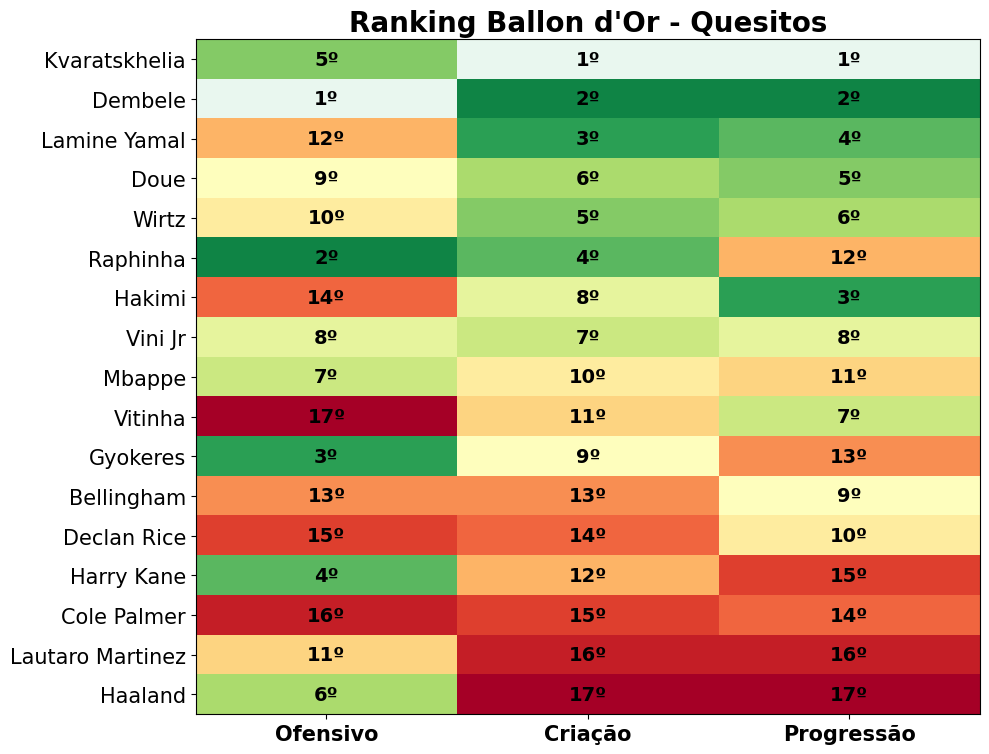

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

# --- gera ranks (1 = melhor) ---
ranking["rank_off"]       = ranking["off_score_weighted"].rank(ascending=False, method="min")
ranking["rank_creation"]  = ranking["creation_score_weighted"].rank(ascending=False, method="min")
ranking["rank_progress"]  = ranking["progression_score_weighted"].rank(ascending=False, method="min")

# ranking geral (core)
ranking["rank_core"] = ranking["core_score_weighted"].rank(ascending=False, method="min")

# ordena pela posição no ranking geral
order = ranking.sort_values("rank_core")["player"].tolist()
order_title = [p.title() for p in order]  # inicial maiúscula

idxd  = ranking.set_index("player").reindex(order)

def percent_rank_from_rank(series):
    r = series.astype(float).values
    n = len(r)
    return np.ones_like(r) if n <= 1 else 1.0 - (r - 1.0) / (n - 1.0)

# matriz de valores normalizados (0–1) para heatmap
vals = np.c_[
    percent_rank_from_rank(idxd["rank_off"]),
    percent_rank_from_rank(idxd["rank_creation"]),
    percent_rank_from_rank(idxd["rank_progress"]),
]

# rótulos com posição ordinal (ex.: "3º")
labels = np.c_[
    idxd["rank_off"].astype(int).astype(str)      + "º",
    idxd["rank_creation"].astype(int).astype(str) + "º",
    idxd["rank_progress"].astype(int).astype(str) + "º",
]

cols = ["Ofensivo", "Criação", "Progressão"]

# colormap igual ao dos laterais (RdYlGn mais claro no topo)
base = cm.get_cmap("RdYlGn", 256)
colors = base(np.linspace(0, 1, 256))
colors[-1, :] = np.array([233/255, 247/255, 239/255, 1.0])
custom_cmap = ListedColormap(colors)

# fontes
FS_TITLE = 20
FS_TICKS = 15
FS_CELLS = 14

# plot
fig, ax = plt.subplots(figsize=(10, max(6, 0.45*len(order))))
im = ax.imshow(vals, aspect="auto", cmap=custom_cmap, vmin=0, vmax=1)

# ticks e labels
ax.set_xticks(range(len(cols)))
ax.set_xticklabels(cols, fontsize=FS_TICKS, fontweight="bold")
ax.set_yticks(range(len(order_title)))
ax.set_yticklabels(order_title, fontsize=FS_TICKS)

# rótulos nas células
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        ax.text(j, i, labels[i, j], ha="center", va="center",
                fontsize=FS_CELLS, fontweight="bold")

ax.set_title("Ranking Ballon d'Or - Quesitos", fontsize=FS_TITLE, fontweight="bold")

plt.tight_layout()
plt.savefig("heatmap_ballon_dor.png", dpi=150)
plt.show()

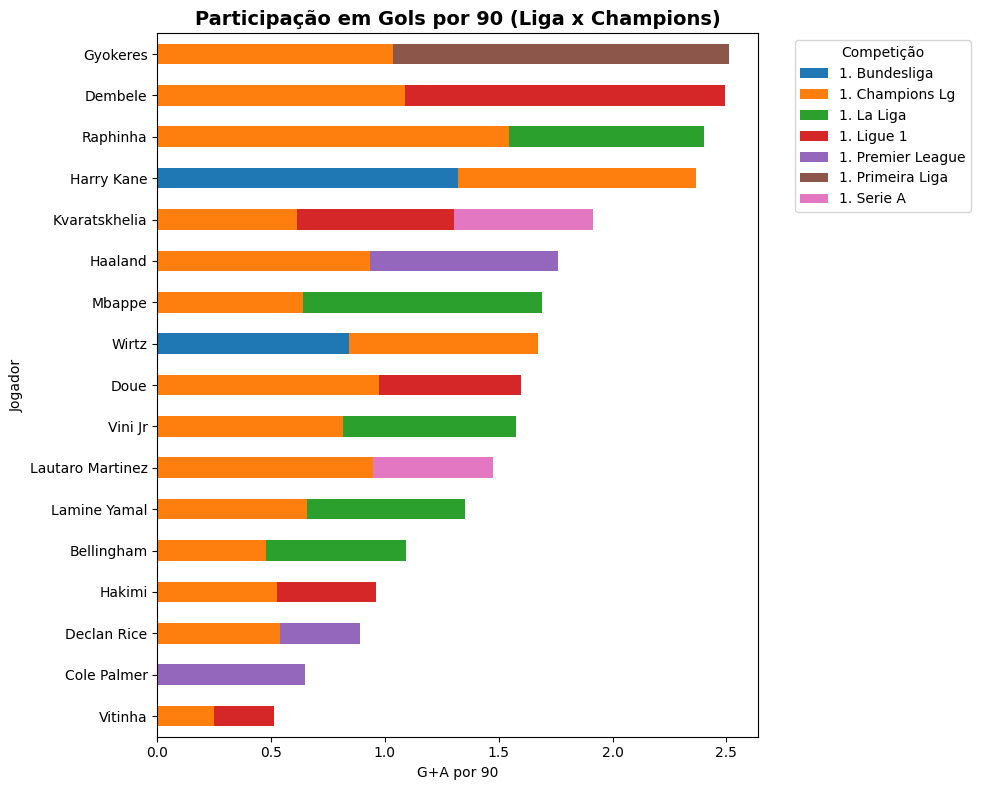

In [32]:
import matplotlib.pyplot as plt

# cria uma coluna de participação em gols por 90
df["goal_contrib/90"] = df["G+A/90"]

# agrega por jogador e competição
gcontrib = (
    df.groupby(["player","Comp"], as_index=False)["goal_contrib/90"]
      .mean()  # média por 90 naquela competição
)

# pivot para facilitar o plot
pivot = gcontrib.pivot(index="player", columns="Comp", values="goal_contrib/90").fillna(0)

# ordena jogadores pela soma total
pivot["total"] = pivot.sum(axis=1)
pivot = pivot.sort_values("total", ascending=True)

# plota gráfico empilhado
ax = pivot.drop(columns="total").plot(kind="barh", stacked=True, figsize=(10,8))

# capitaliza nomes no eixo Y
ax.set_yticklabels([name.title() for name in pivot.index])

plt.title("Participação em Gols por 90 (Liga x Champions)", fontsize=14, fontweight="bold")
plt.xlabel("G+A por 90")
plt.ylabel("Jogador")
plt.legend(title="Competição", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


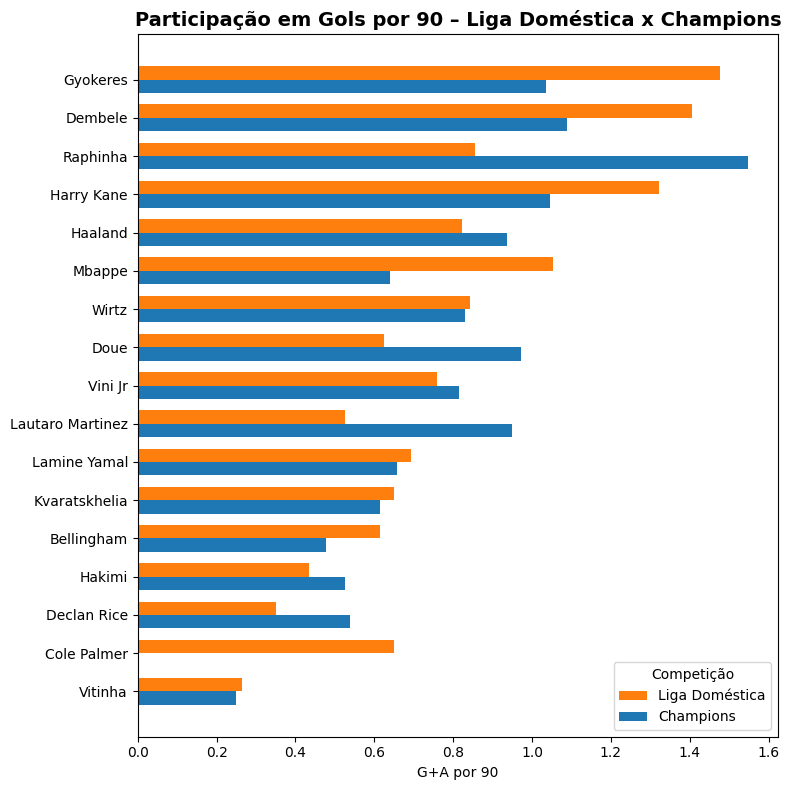

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# --- Filtro: Liga + Champions ---
df["Comp_clean"] = df["Comp"].str.replace("\xa0"," ",regex=False).str.strip()
df_plot = df[df["Comp_clean"].str.startswith("1.")].copy()

df_plot["Comp_grouped"] = np.where(
    df_plot["Comp_clean"] == "1. Champions Lg",
    "Champions",
    "Liga Doméstica"
)

# agrega G+A/90 por jogador e grupo
df_plot["goal_contrib/90"] = df_plot["G+A/90"]
gcontrib = (
    df_plot.groupby(["player","Comp_grouped"], as_index=False)["goal_contrib/90"]
           .mean()
)

pivot = gcontrib.pivot(index="player", columns="Comp_grouped", values="goal_contrib/90").fillna(0)

# ordena por total
pivot["total"] = pivot.sum(axis=1)
pivot = pivot.sort_values("total", ascending=True).drop(columns="total")

players = pivot.index.tolist()
cols = pivot.columns.tolist()  # <- ordem real do pivot

fig, ax = plt.subplots(figsize=(8, 8))

bar_height = 0.35
y_positions = np.arange(len(players))

handles_for_legend = []
labels_for_legend = []

for i, col in enumerate(cols):
    offset = (i - (len(cols)-1)/2) * bar_height
    bars = ax.barh(y_positions + offset,
                   pivot[col],
                   height=bar_height,
                   label=col)
    handles_for_legend.append(bars[0])
    labels_for_legend.append(col)

ax.set_yticks(y_positions)
ax.set_yticklabels([p.title() for p in players])
ax.set_xlabel("G+A por 90")
ax.set_title("Participação em Gols por 90 – Liga Doméstica x Champions", fontsize=14, fontweight="bold")

# INVERTE A ORDEM APENAS NA LEGENDA
ax.legend(handles_for_legend[::-1], labels_for_legend[::-1],
          title="Competição", loc="lower right")

plt.tight_layout()
plt.show()

**É possível ver que a menor competitividade da League 1 inflou os rankings**

# **Análise aplicando pesos por Liga Doméstica**

In [34]:
df_weights.head()

,player,Squad,Comp,Minutes,90s,Gls,Ast,G+A,G-PK,xG,...,xG/90,npxG/90,xAG/90,npxG+xAG/90,PrgC/90,PrgP/90,PrgR/90,SCA/90,GCA/90,PPA/90
0,vini jr,Real Madrid,1. Champions Lg,1103.0,12.3,8.0,2.0,10.0,7.0,6.7,...,0.546691,0.416138,0.310063,0.726201,6.690843,2.284678,9.954669,4.242974,0.734361,1.305530
2,vini jr,Real Madrid,1. La Liga,2253.0,25.0,11.0,8.0,19.0,9.0,10.4,...,0.415446,0.327563,0.319574,0.647137,6.750999,3.395473,10.226365,5.392810,0.719041,1.438083
5,raphinha,Barcelona,1. Champions Lg,1222.0,13.6,13.0,8.0,21.0,13.0,5.9,...,0.434534,0.434534,0.545008,0.972177,3.387889,4.271686,10.679214,5.597381,0.883797,1.841244
7,raphinha,Barcelona,1. La Liga,2839.0,31.5,18.0,9.0,27.0,16.0,19.2,...,0.608665,0.557943,0.402607,0.960549,2.979923,4.279676,11.063755,5.167312,0.697429,2.123987
9,dembele,Paris S-G,1. Champions Lg,1158.0,12.9,8.0,6.0,14.0,8.0,8.1,...,0.629534,0.629534,0.287565,0.917098,6.917098,6.761658,10.725389,6.217617,0.699482,2.176166


In [35]:
# Métricas por 90 minutos

metrics = [
    "Gls","Ast","G+A","G-PK","xG","npxG","xAG","npxG+xAG",
    "PrgC","PrgP","PrgR","SCA","GCA","PPA"
]

for metric in metrics:
  df_weights[f"{metric}/90"] = (df_weights[metric] * 90) / df_weights['Minutes']

In [36]:
# Criando métricas de score

# Produção ofensiva: gols, assistências e xG combinados
df_weights["off_score"] = (
    df_weights["Gls/90"] +
    df_weights["Ast/90"] +
    df_weights["npxG+xAG/90"]
)

# Criação de jogo: SCA, GCA e passes para a área
df_weights["creation_score"] = (
    df_weights["SCA/90"] +
    df_weights["GCA/90"] +
    df_weights["PPA/90"]
)

# Progressão: conduções e passes progressivos
df_weights["progression_score"] = (
    df_weights["PrgC/90"] +
    df_weights["PrgP/90"]
)

# Score agregado sem peso (por linha de competição)
df_weights["core_score"] = (
    0.4 * df_weights["off_score"] +
    0.35 * df_weights["creation_score"] +
    0.25 * df_weights["progression_score"]
)

# Conferir rapidamente as novas colunas
df_weights[["player","Comp","off_score","creation_score","progression_score","core_score"]].head()

,player,Comp,off_score,creation_score,progression_score,core_score
0,vini jr,1. Champions Lg,1.542158,6.282865,8.975521,5.059746
2,vini jr,1. La Liga,1.406125,7.549933,10.146471,5.741545
5,raphinha,1. Champions Lg,2.518822,8.322422,7.659574,5.835270
7,raphinha,1. La Liga,1.816485,7.988728,7.259598,5.337548
9,dembele,1. Champions Lg,2.005181,9.093264,13.678756,7.404404


In [37]:
df_weights.columns

Index(['player', 'Squad', 'Comp', 'Minutes', '90s', 'Gls', 'Ast', 'G+A',
       'G-PK', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'SCA',
       'GCA', 'PPA', 'Trophies', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90',
       'xG/90', 'npxG/90', 'xAG/90', 'npxG+xAG/90', 'PrgC/90', 'PrgP/90',
       'PrgR/90', 'SCA/90', 'GCA/90', 'PPA/90', 'off_score', 'creation_score',
       'progression_score', 'core_score'],
      dtype='object')

In [38]:
df_champions = df_weights.copy()

In [39]:
# Normaliza o nome da competição (remove \xa0 se existir e espaços extras)
df_weights["Comp_clean"] = df_weights["Comp"].astype(str).str.replace("\xa0", " ", regex=False).str.strip()

# Aplica os pesos conforme o dicionário
league_weights = {
    "1. Champions Lg": 1.30,
    "1. Premier League": 1.15,
    "1. La Liga": 1.05,
    "1. Serie A": 1.00,
    "1. Bundesliga": 0.98,
    "1. Primeira Liga": 0.93,
    "1. Ligue 1": 0.88,
}

df_weights["weight"] = df_weights["Comp_clean"].map(league_weights).fillna(1.0)

# Aplica peso nos scores
df_weights["off_score_weighted"] = df_weights["off_score"] * df_weights["weight"]
df_weights["creation_score_weighted"] = df_weights["creation_score"] * df_weights["weight"]
df_weights["progression_score_weighted"] = df_weights["progression_score"] * df_weights["weight"]
df_weights["core_score_weighted"] = df_weights["core_score"] * df_weights["weight"]

# Agrupa por jogador
ranking_weights = (
    df_weights.groupby("player", as_index=False)[
        ["off_score_weighted","creation_score_weighted",
         "progression_score_weighted","core_score_weighted"]
    ].sum()
)

ranking_weights = ranking_weights.sort_values("core_score_weighted", ascending=False)

print(ranking_weights.head(10))

           player  off_score_weighted  creation_score_weighted  \
9   kvaratskhelia            3.816999                24.075509   
3         dembele            4.941533                20.061706   
10   lamine yamal            3.044783                21.339069   
16          wirtz            3.182027                18.061174   
13       raphinha            5.181777                19.207314   
4            doue            3.231536                16.328989   
14        vini jr            3.481237                16.095154   
7          hakimi            2.008561                13.956133   
12         mbappe            3.766605                12.834290   
0      bellingham            2.407436                11.349020   

    progression_score_weighted  core_score_weighted  
9                    30.818978            17.657972  
3                    29.868395            16.465309  
10                   25.827878            15.143557  
16                   24.003563            13.595112  
13 

In [40]:
# Normaliza o nome da competição (remove \xa0 se existir e espaços extras)
df_champions["Comp_clean"] = df_champions["Comp"].astype(str).str.replace("\xa0", " ", regex=False).str.strip()

# Aplica os pesos conforme o dicionário
champions_weights = {
    "1. Champions Lg": 1.30,
    "1. Premier League": 0,
    "1. La Liga": 0,
    "1. Serie A": 0,
    "1. Bundesliga": 0,
    "1. Primeira Liga": 0,
    "1. Ligue 1": 0,
}

df_champions["weight"] = df_champions["Comp_clean"].map(champions_weights).fillna(1.0)

# Aplica peso nos scores
df_champions["off_score_weighted"] = df_champions["off_score"] * df_champions["weight"]
df_champions["creation_score_weighted"] = df_champions["creation_score"] * df_champions["weight"]
df_champions["progression_score_weighted"] = df_champions["progression_score"] * df_champions["weight"]
df_champions["core_score_weighted"] = df_champions["core_score"] * df_champions["weight"]

# Agrupa por jogador
ranking_champions = (
    df_champions.groupby("player", as_index=False)[
        ["off_score_weighted","creation_score_weighted",
         "progression_score_weighted","core_score_weighted"]
    ].sum()
)

ranking_champions = ranking_champions.sort_values("core_score_weighted", ascending=False)

print(ranking_champions.head(10))

           player  off_score_weighted  creation_score_weighted  \
3         dembele            2.606736                11.821244   
10   lamine yamal            1.529342                11.015539   
13       raphinha            3.274468                10.819149   
9   kvaratskhelia            1.356753                 9.896317   
16          wirtz            1.865217                 9.094862   
7          hakimi            1.276364                 8.129221   
4            doue            2.087027                 7.905405   
14        vini jr            2.004805                 8.167724   
15        vitinha            0.549827                 7.034554   
12         mbappe            1.806389                 6.332742   

    progression_score_weighted  core_score_weighted  
3                    17.782383             9.625725  
10                   14.544790             8.103373  
13                    9.957447             7.585851  
9                    12.769441             7.198772  
16 

/tmp/ipython-input-102029541.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = cm.get_cmap("RdYlGn", 256)


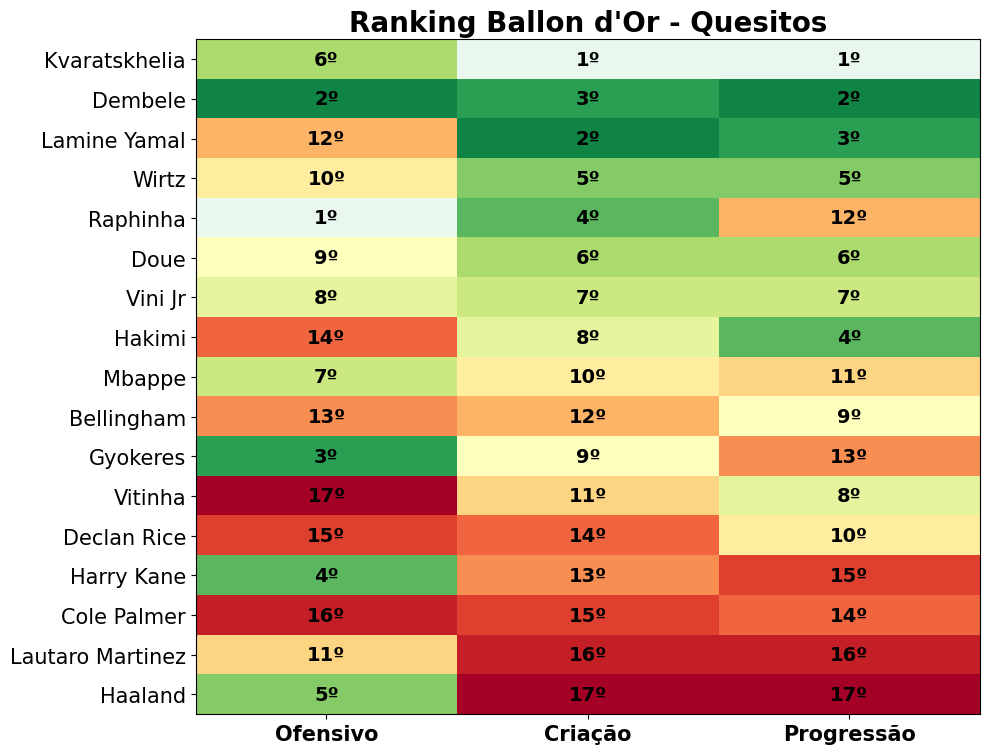

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

# --- gera ranks (1 = melhor) ---
ranking_weights["rank_off"]       = ranking_weights["off_score_weighted"].rank(ascending=False, method="min")
ranking_weights["rank_creation"]  = ranking_weights["creation_score_weighted"].rank(ascending=False, method="min")
ranking_weights["rank_progress"]  = ranking_weights["progression_score_weighted"].rank(ascending=False, method="min")

# ranking geral (core)
ranking_weights["rank_core"] = ranking_weights["core_score_weighted"].rank(ascending=False, method="min")

# ordena pela posição no ranking geral
order = ranking_weights.sort_values("rank_core")["player"].tolist()
order_title = [p.title() for p in order]  # nomes com inicial maiúscula

# reindexa mantendo os nomes capitalizados
idxd  = ranking_weights.set_index("player").reindex(order)
idxd.index = idxd.index.str.title()

def percent_rank_from_rank(series):
    r = series.astype(float).values
    n = len(r)
    return np.ones_like(r) if n <= 1 else 1.0 - (r - 1.0) / (n - 1.0)

# matriz de valores normalizados (0–1) para heatmap
vals = np.c_[
    percent_rank_from_rank(idxd["rank_off"]),
    percent_rank_from_rank(idxd["rank_creation"]),
    percent_rank_from_rank(idxd["rank_progress"]),
]

# rótulos com posição ordinal (ex.: "3º")
labels = np.c_[
    idxd["rank_off"].astype(int).astype(str)      + "º",
    idxd["rank_creation"].astype(int).astype(str) + "º",
    idxd["rank_progress"].astype(int).astype(str) + "º",
]

cols = ["Ofensivo", "Criação", "Progressão"]

# colormap igual ao dos laterais (RdYlGn mais claro no topo)
base = cm.get_cmap("RdYlGn", 256)
colors = base(np.linspace(0, 1, 256))
colors[-1, :] = np.array([233/255, 247/255, 239/255, 1.0])
custom_cmap = ListedColormap(colors)

# fontes
FS_TITLE = 20
FS_TICKS = 15
FS_CELLS = 14

# plot
fig, ax = plt.subplots(figsize=(10, max(6, 0.45*len(order))))
im = ax.imshow(vals, aspect="auto", cmap=custom_cmap, vmin=0, vmax=1)

# ticks e labels
ax.set_xticks(range(len(cols)))
ax.set_xticklabels(cols, fontsize=FS_TICKS, fontweight="bold")
ax.set_yticks(range(len(order_title)))
ax.set_yticklabels(order_title, fontsize=FS_TICKS)

# rótulos nas células
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        ax.text(j, i, labels[i, j], ha="center", va="center",
                fontsize=FS_CELLS, fontweight="bold")

ax.set_title("Ranking Ballon d'Or - Quesitos", fontsize=FS_TITLE, fontweight="bold")

plt.tight_layout()
plt.savefig("heatmap_ballon_dor_weights.png", dpi=150)
plt.show()


/tmp/ipython-input-2126460059.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = cm.get_cmap("RdYlGn", 256)


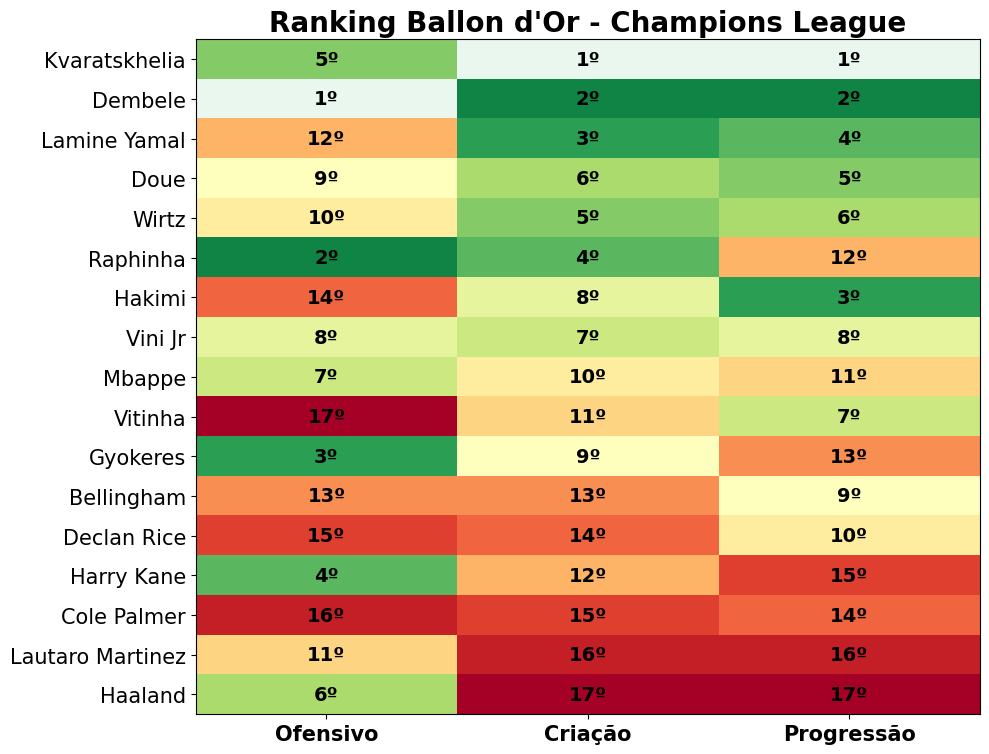

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

# --- agrega por jogador para evitar duplicatas ---
df_champions_grouped = (
    df_champions.groupby("player", as_index=False)[
        ["off_score", "creation_score", "progression_score", "core_score"]
    ].sum()
)

# --- gera ranks (1 = melhor) ---
df_champions_grouped["rank_off"]       = df_champions_grouped["off_score"].rank(ascending=False, method="min")
df_champions_grouped["rank_creation"]  = df_champions_grouped["creation_score"].rank(ascending=False, method="min")
df_champions_grouped["rank_progress"]  = df_champions_grouped["progression_score"].rank(ascending=False, method="min")
df_champions_grouped["rank_core"]      = df_champions_grouped["core_score"].rank(ascending=False, method="min")

# ordena pela posição no ranking geral
order = df_champions_grouped.sort_values("rank_core")["player"].tolist()
order_title = [p.title() for p in order]

# reindexa mantendo a ordem
idxd = df_champions_grouped.set_index("player").loc[order]
idxd.index = idxd.index.str.title()

def percent_rank_from_rank(series):
    r = series.astype(float).values
    n = len(r)
    return np.ones_like(r) if n <= 1 else 1.0 - (r - 1.0) / (n - 1.0)

# matriz para heatmap
vals = np.c_[
    percent_rank_from_rank(idxd["rank_off"]),
    percent_rank_from_rank(idxd["rank_creation"]),
    percent_rank_from_rank(idxd["rank_progress"]),
]

labels = np.c_[
    idxd["rank_off"].astype(int).astype(str)      + "º",
    idxd["rank_creation"].astype(int).astype(str) + "º",
    idxd["rank_progress"].astype(int).astype(str) + "º",
]

cols = ["Ofensivo", "Criação", "Progressão"]

# colormap
base = cm.get_cmap("RdYlGn", 256)
colors = base(np.linspace(0, 1, 256))
colors[-1, :] = np.array([233/255, 247/255, 239/255, 1.0])
custom_cmap = ListedColormap(colors)

# plot
fig, ax = plt.subplots(figsize=(10, max(6, 0.45*len(order))))
im = ax.imshow(vals, aspect="auto", cmap=custom_cmap, vmin=0, vmax=1)

ax.set_xticks(range(len(cols)))
ax.set_xticklabels(cols, fontsize=15, fontweight="bold")
ax.set_yticks(range(len(order_title)))
ax.set_yticklabels(order_title, fontsize=15)

# rótulos nas células
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        ax.text(j, i, labels[i, j], ha="center", va="center",
                fontsize=14, fontweight="bold")

ax.set_title("Ranking Ballon d'Or - Champions League", fontsize=20, fontweight="bold")
plt.tight_layout()
plt.savefig("heatmap_ballon_dor_champions.png", dpi=150)
plt.show()

/tmp/ipython-input-3850007981.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = cm.get_cmap("RdYlGn", 256)


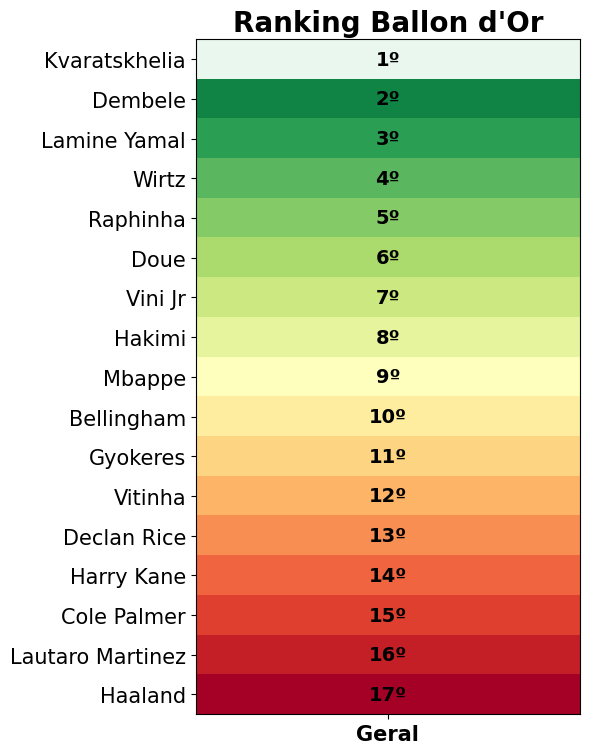

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

# --- gera ranking geral ---
ranking_weights["rank_core"] = ranking_weights["core_score_weighted"].rank(ascending=False, method="min")

# ordena pela posição no ranking geral
order = ranking_weights.sort_values("rank_core")["player"].tolist()
order_title = [p.title() for p in order]

# reindexa para manter a ordem
idxd = ranking_weights.set_index("player").reindex(order)
idxd.index = idxd.index.str.title()

def percent_rank_from_rank(series):
    r = series.astype(float).values
    n = len(r)
    return np.ones_like(r) if n <= 1 else 1.0 - (r - 1.0) / (n - 1.0)

# matriz com apenas o ranking geral
vals = percent_rank_from_rank(idxd["rank_core"]).reshape(-1, 1)

# rótulos com posição ordinal
labels = (idxd["rank_core"].astype(int).astype(str) + "º").values.reshape(-1, 1)

cols = ["Geral"]

# colormap
base = cm.get_cmap("RdYlGn", 256)
colors = base(np.linspace(0, 1, 256))
colors[-1, :] = np.array([233/255, 247/255, 239/255, 1.0])
custom_cmap = ListedColormap(colors)

# fontes
FS_TITLE = 20
FS_TICKS = 15
FS_CELLS = 14

# plot
fig, ax = plt.subplots(figsize=(6, max(6, 0.45*len(order))))
im = ax.imshow(vals, aspect="auto", cmap=custom_cmap, vmin=0, vmax=1)

ax.set_xticks([0])
ax.set_xticklabels(cols, fontsize=FS_TICKS, fontweight="bold")
ax.set_yticks(range(len(order_title)))
ax.set_yticklabels(order_title, fontsize=FS_TICKS)

# rótulos nas células
for i in range(vals.shape[0]):
    ax.text(0, i, labels[i, 0], ha="center", va="center",
            fontsize=FS_CELLS, fontweight="bold")

ax.set_title("Ranking Ballon d'Or", fontsize=FS_TITLE, fontweight="bold")

plt.tight_layout()
plt.savefig("heatmap_ballon_dor_geral.png", dpi=150)
plt.show()

/tmp/ipython-input-181898764.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = cm.get_cmap("RdYlGn", 256)


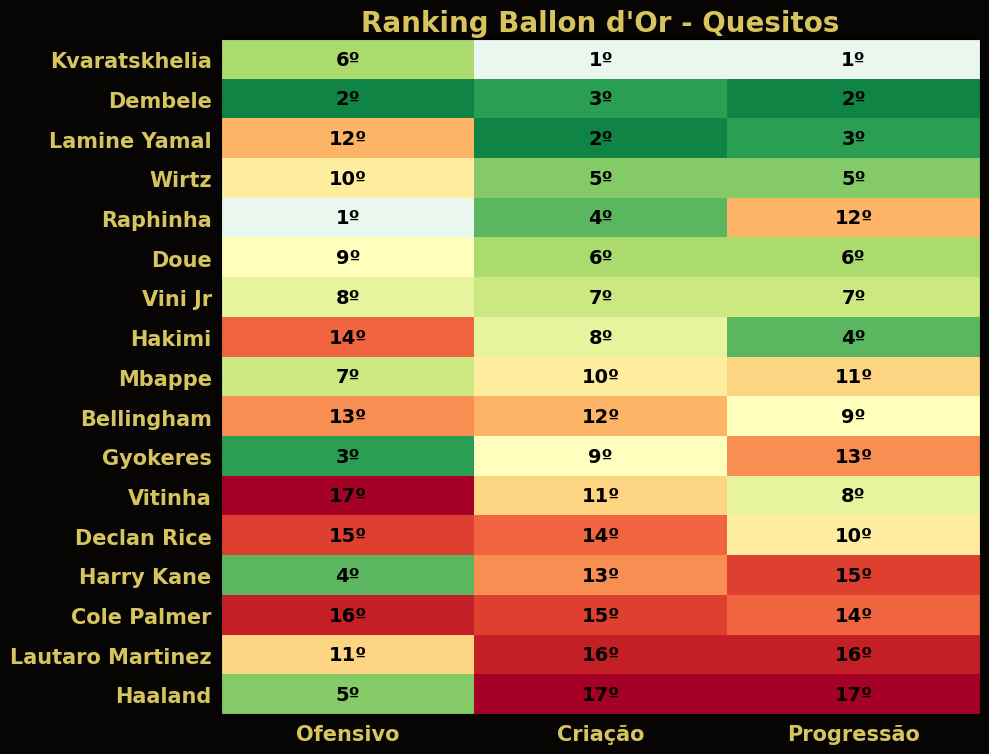

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

# --- gera ranks (1 = melhor) ---
ranking_weights["rank_off"]       = ranking_weights["off_score_weighted"].rank(ascending=False, method="min")
ranking_weights["rank_creation"]  = ranking_weights["creation_score_weighted"].rank(ascending=False, method="min")
ranking_weights["rank_progress"]  = ranking_weights["progression_score_weighted"].rank(ascending=False, method="min")
ranking_weights["rank_core"]      = ranking_weights["core_score_weighted"].rank(ascending=False, method="min")

# ordena pela posição no ranking geral
order = ranking_weights.sort_values("rank_core")["player"].tolist()
order_title = [p.title() for p in order]

idxd  = ranking_weights.set_index("player").reindex(order)
idxd.index = idxd.index.str.title()

def percent_rank_from_rank(series):
    r = series.astype(float).values
    n = len(r)
    return np.ones_like(r) if n <= 1 else 1.0 - (r - 1.0) / (n - 1.0)

# matriz de valores normalizados
vals = np.c_[
    percent_rank_from_rank(idxd["rank_off"]),
    percent_rank_from_rank(idxd["rank_creation"]),
    percent_rank_from_rank(idxd["rank_progress"]),
]

labels = np.c_[
    idxd["rank_off"].astype(int).astype(str)      + "º",
    idxd["rank_creation"].astype(int).astype(str) + "º",
    idxd["rank_progress"].astype(int).astype(str) + "º",
]

cols = ["Ofensivo", "Criação", "Progressão"]

# colormap igual ao dos laterais
base = cm.get_cmap("RdYlGn", 256)
colors = base(np.linspace(0, 1, 256))
colors[-1, :] = np.array([233/255, 247/255, 239/255, 1.0])
custom_cmap = ListedColormap(colors)

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, max(6, 0.45*len(order))))

# Fundo
fig.patch.set_facecolor("#070404")
ax.set_facecolor("#070404")

im = ax.imshow(vals, aspect="auto", cmap=custom_cmap, vmin=0, vmax=1)

# ticks e labels (cor #d6c45e)
ax.set_xticks(range(len(cols)))
ax.set_xticklabels(cols, fontsize=15, fontweight="bold", color="#d6c45e")
ax.set_yticks(range(len(order_title)))
ax.set_yticklabels(order_title, fontsize=15, fontweight="bold", color="#d6c45e")

# rótulos dentro do heatmap (cor preta)
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        ax.text(j, i, labels[i, j], ha="center", va="center",
                fontsize=14, fontweight="bold", color="black")

ax.set_title("Ranking Ballon d'Or - Quesitos", fontsize=20, fontweight="bold", color="#d6c45e")

plt.tight_layout()
plt.savefig("heatmap_ballon_dor_weights_custom.png", dpi=150, facecolor=fig.get_facecolor())
plt.show()

/tmp/ipython-input-2451940119.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = cm.get_cmap("RdYlGn", 256)


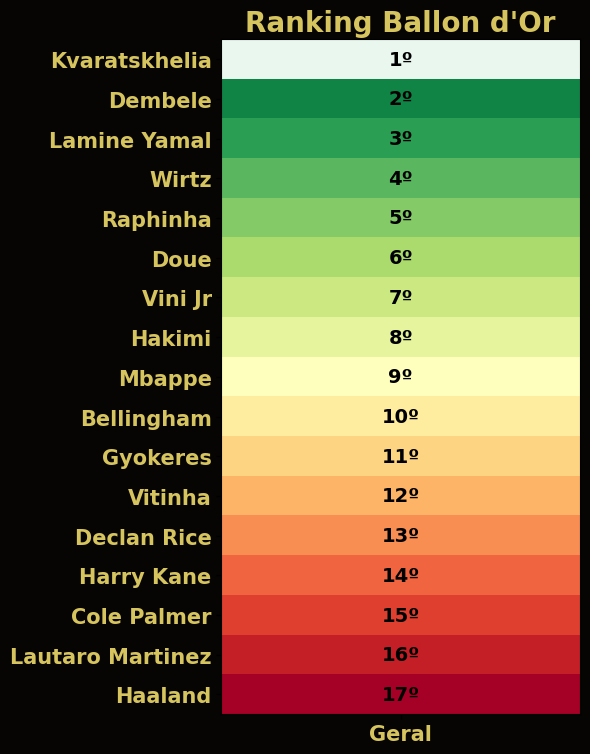

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

# --- gera ranking geral ---
ranking_weights["rank_core"] = ranking_weights["core_score_weighted"].rank(ascending=False, method="min")

# ordena pela posição no ranking geral
order = ranking_weights.sort_values("rank_core")["player"].tolist()
order_title = [p.title() for p in order]

# reindexa para manter a ordem
idxd = ranking_weights.set_index("player").reindex(order)
idxd.index = idxd.index.str.title()

def percent_rank_from_rank(series):
    r = series.astype(float).values
    n = len(r)
    return np.ones_like(r) if n <= 1 else 1.0 - (r - 1.0) / (n - 1.0)

# matriz com apenas o ranking geral
vals = percent_rank_from_rank(idxd["rank_core"]).reshape(-1, 1)

# rótulos com posição ordinal
labels = (idxd["rank_core"].astype(int).astype(str) + "º").values.reshape(-1, 1)

cols = ["Geral"]

# colormap
base = cm.get_cmap("RdYlGn", 256)
colors = base(np.linspace(0, 1, 256))
colors[-1, :] = np.array([233/255, 247/255, 239/255, 1.0])
custom_cmap = ListedColormap(colors)

# fontes
FS_TITLE = 20
FS_TICKS = 15
FS_CELLS = 14

# --- plot ---
fig, ax = plt.subplots(figsize=(6, max(6, 0.45*len(order))))

# fundo escuro
fig.patch.set_facecolor("#070404")
ax.set_facecolor("#070404")

im = ax.imshow(vals, aspect="auto", cmap=custom_cmap, vmin=0, vmax=1)

ax.set_xticks([0])
ax.set_xticklabels(cols, fontsize=FS_TICKS, fontweight="bold", color="#d6c45e")
ax.set_yticks(range(len(order_title)))
ax.set_yticklabels(order_title, fontsize=FS_TICKS, fontweight="bold", color="#d6c45e")

# rótulos nas células (em preto)
for i in range(vals.shape[0]):
    ax.text(0, i, labels[i, 0], ha="center", va="center",
            fontsize=FS_CELLS, fontweight="bold", color="black")

ax.set_title("Ranking Ballon d'Or", fontsize=FS_TITLE, fontweight="bold", color="#d6c45e")

plt.tight_layout()
plt.savefig("heatmap_ballon_dor_geral_custom.png", dpi=150, facecolor=fig.get_facecolor())
plt.show()

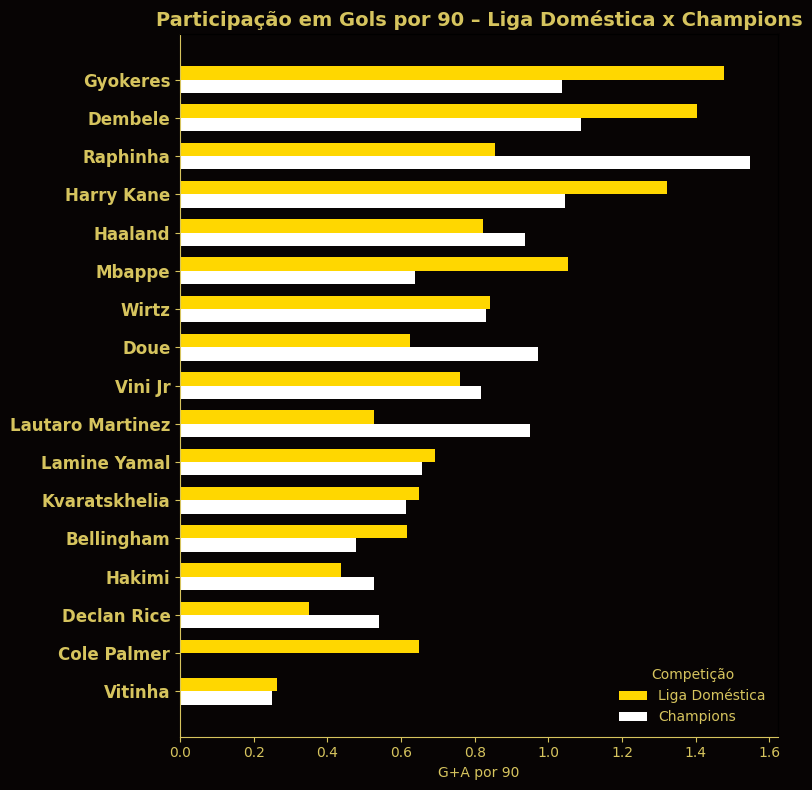

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# --- Filtro: Liga + Champions ---
df["Comp_clean"] = df["Comp"].str.replace("\xa0"," ",regex=False).str.strip()
df_plot = df[df["Comp_clean"].str.startswith("1.")].copy()

df_plot["Comp_grouped"] = np.where(
    df_plot["Comp_clean"] == "1. Champions Lg",
    "Champions",
    "Liga Doméstica"
)

# agrega G+A/90 por jogador e grupo
df_plot["goal_contrib/90"] = df_plot["G+A/90"]
gcontrib = (
    df_plot.groupby(["player","Comp_grouped"], as_index=False)["goal_contrib/90"]
           .mean()
)

pivot = gcontrib.pivot(index="player", columns="Comp_grouped", values="goal_contrib/90").fillna(0)

# ordena por total
pivot["total"] = pivot.sum(axis=1)
pivot = pivot.sort_values("total", ascending=True).drop(columns="total")

players = pivot.index.tolist()
cols = pivot.columns.tolist()

fig, ax = plt.subplots(figsize=(8, 8))

# fundo escuro
fig.patch.set_facecolor("#070404")
ax.set_facecolor("#070404")

bar_height = 0.35
y_positions = np.arange(len(players))

# cores personalizadas
colors = {
    "Liga Doméstica": "#FFD700",  # amarelo ouro
    "Champions": "#FFFFFF"       # branco puro
}

handles_for_legend = []
labels_for_legend = []

for i, col in enumerate(cols):
    offset = (i - (len(cols)-1)/2) * bar_height
    bars = ax.barh(y_positions + offset,
                   pivot[col],
                   height=bar_height,
                   color=colors.get(col, "#FFFFFF"),  # fallback = branco
                   label=col)
    handles_for_legend.append(bars[0])
    labels_for_legend.append(col)

# textos dourados
ax.set_yticks(y_positions)
ax.set_yticklabels([p.title() for p in players], color="#d6c45e", fontsize=12, fontweight="bold")
ax.set_xlabel("G+A por 90", color="#d6c45e")
ax.set_title("Participação em Gols por 90 – Liga Doméstica x Champions",
             fontsize=14, fontweight="bold", color="#d6c45e")

# legenda sem box
leg = ax.legend(handles_for_legend[::-1], labels_for_legend[::-1],
                title="Competição", loc="lower right", labelcolor="#d6c45e",
                frameon=False)  # <- remove o box
plt.setp(leg.get_title(), color="#d6c45e")

# eixos dourados
ax.tick_params(axis='x', colors="#d6c45e")
ax.tick_params(axis='y', colors="#d6c45e")
ax.spines['bottom'].set_color("#d6c45e")
ax.spines['left'].set_color("#d6c45e")

plt.tight_layout()
plt.savefig("barplot_goal_contrib_custom_colors.png", dpi=150, facecolor=fig.get_facecolor())
plt.show()

/tmp/ipython-input-1507044796.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = cm.get_cmap("RdYlGn", 256)


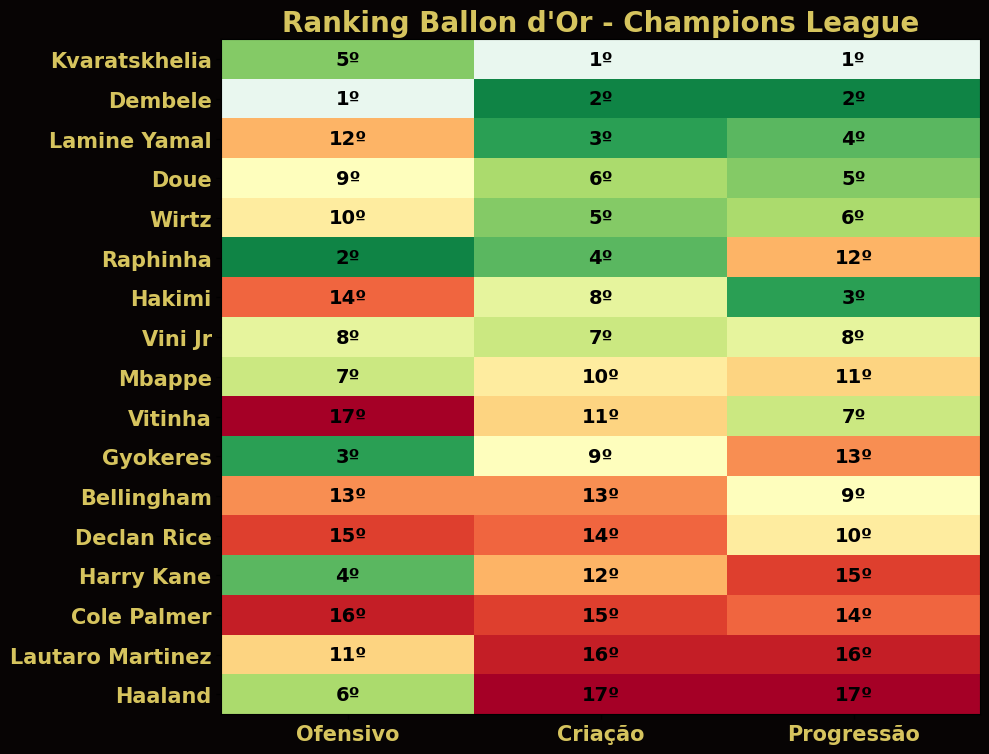

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

# --- agrega por jogador para evitar duplicatas ---
df_champions_grouped = (
    df_champions.groupby("player", as_index=False)[
        ["off_score", "creation_score", "progression_score", "core_score"]
    ].sum()
)

# --- gera ranks (1 = melhor) ---
df_champions_grouped["rank_off"]       = df_champions_grouped["off_score"].rank(ascending=False, method="min")
df_champions_grouped["rank_creation"]  = df_champions_grouped["creation_score"].rank(ascending=False, method="min")
df_champions_grouped["rank_progress"]  = df_champions_grouped["progression_score"].rank(ascending=False, method="min")
df_champions_grouped["rank_core"]      = df_champions_grouped["core_score"].rank(ascending=False, method="min")

# ordena pela posição no ranking geral
order = df_champions_grouped.sort_values("rank_core")["player"].tolist()
order_title = [p.title() for p in order]

# reindexa mantendo a ordem
idxd = df_champions_grouped.set_index("player").loc[order]
idxd.index = idxd.index.str.title()

def percent_rank_from_rank(series):
    r = series.astype(float).values
    n = len(r)
    return np.ones_like(r) if n <= 1 else 1.0 - (r - 1.0) / (n - 1.0)

# matriz para heatmap
vals = np.c_[
    percent_rank_from_rank(idxd["rank_off"]),
    percent_rank_from_rank(idxd["rank_creation"]),
    percent_rank_from_rank(idxd["rank_progress"]),
]

labels = np.c_[
    idxd["rank_off"].astype(int).astype(str)      + "º",
    idxd["rank_creation"].astype(int).astype(str) + "º",
    idxd["rank_progress"].astype(int).astype(str) + "º",
]

cols = ["Ofensivo", "Criação", "Progressão"]

# colormap
base = cm.get_cmap("RdYlGn", 256)
colors = base(np.linspace(0, 1, 256))
colors[-1, :] = np.array([233/255, 247/255, 239/255, 1.0])
custom_cmap = ListedColormap(colors)

# --- plot com esquema Ballon d'Or ---
fig, ax = plt.subplots(figsize=(10, max(6, 0.45*len(order))))

# fundo escuro
fig.patch.set_facecolor("#070404")
ax.set_facecolor("#070404")

im = ax.imshow(vals, aspect="auto", cmap=custom_cmap, vmin=0, vmax=1)

# ticks e labels dourados
ax.set_xticks(range(len(cols)))
ax.set_xticklabels(cols, fontsize=15, fontweight="bold", color="#d6c45e")
ax.set_yticks(range(len(order_title)))
ax.set_yticklabels(order_title, fontsize=15, fontweight="bold", color="#d6c45e")

# rótulos dentro do heatmap (em preto)
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        ax.text(j, i, labels[i, j], ha="center", va="center",
                fontsize=14, fontweight="bold", color="black")

ax.set_title("Ranking Ballon d'Or - Champions League", fontsize=20, fontweight="bold", color="#d6c45e")

plt.tight_layout()
plt.savefig("heatmap_ballon_dor_champions_custom.png", dpi=150, facecolor=fig.get_facecolor())
plt.show()